TASK-1

TITANIC SURVIVAL PREDICTION

IMPORTING ALL REQUIRED PACKAGES

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

LOADING THE DATA SET INTO THE PANDAS LIBRARY

In [34]:
titanic=pd.read_csv('tested.csv',)

In [35]:
titanic.shape

(418, 12)

In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


DATA PREPROCESSING

In [37]:
def dataoverview(titanic, message):
    print(f'{message}:\n')
    num_rows, num_columns = titanic.shape
    print("Number of rows:", num_rows)
    print("\nNumber of columns:", num_columns)
    print("\nColumn names:")
    for column in titanic.columns:
        print(column)
    print("\nMissing values count:", titanic.isna().sum().sum())
    print("\nUnique values count:")
    for column in titanic.columns:
        print(f"{column}: {titanic[column].nunique()}")


In [38]:
dataoverview(titanic, 'Overiew of the training dataset')

Overiew of the training dataset:

Number of rows: 418

Number of columns: 12

Column names:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked

Missing values count: 414

Unique values count:
PassengerId: 418
Survived: 2
Pclass: 3
Name: 418
Sex: 2
Age: 79
SibSp: 7
Parch: 8
Ticket: 363
Fare: 169
Cabin: 76
Embarked: 3


In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [41]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


VISUALIZING THE DATA

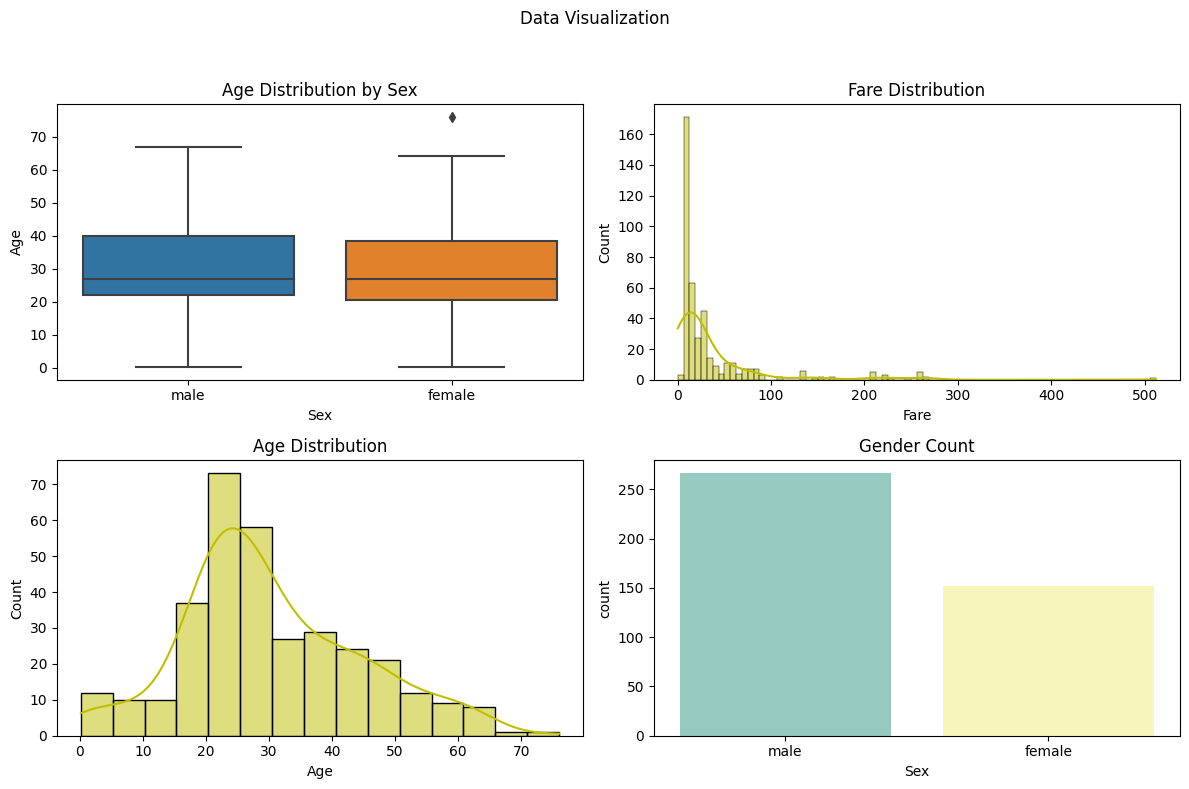

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Data Visualization')

# Plot 1: Boxplot for Age by Sex
sns.boxplot(x='Sex', y='Age', data=titanic, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution by Sex')

# Plot 2: Distribution Plot for Fare
sns.histplot(x='Fare', data=titanic, color='y', ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Fare Distribution')

# Plot 3: Distribution Plot for Age
sns.histplot(x='Age', data=titanic, color='y', ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Age Distribution')

# Plot 4: Count Plot for Sex
sns.countplot(x='Sex', data=titanic, ax=axs[1, 1], palette='Set3')
axs[1, 1].set_title('Gender Count')

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [43]:
corrmat=titanic.corr()

<ipython-input-43-991edd9e033f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=titanic.corr()


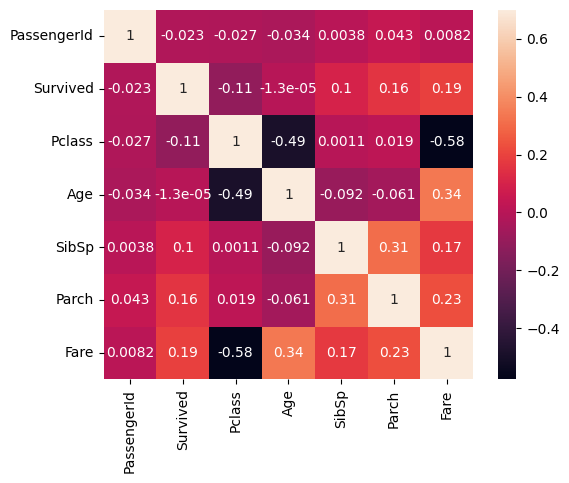

In [44]:
sns.heatmap(corrmat, vmax=0.7, square=True, annot=True)
plt.show()

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
titanic.drop(columns=['PassengerId', 'Name', 'Embarked', 'Cabin'], inplace=True)

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [48]:
titanic.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [50]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)


In [49]:
titanic.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

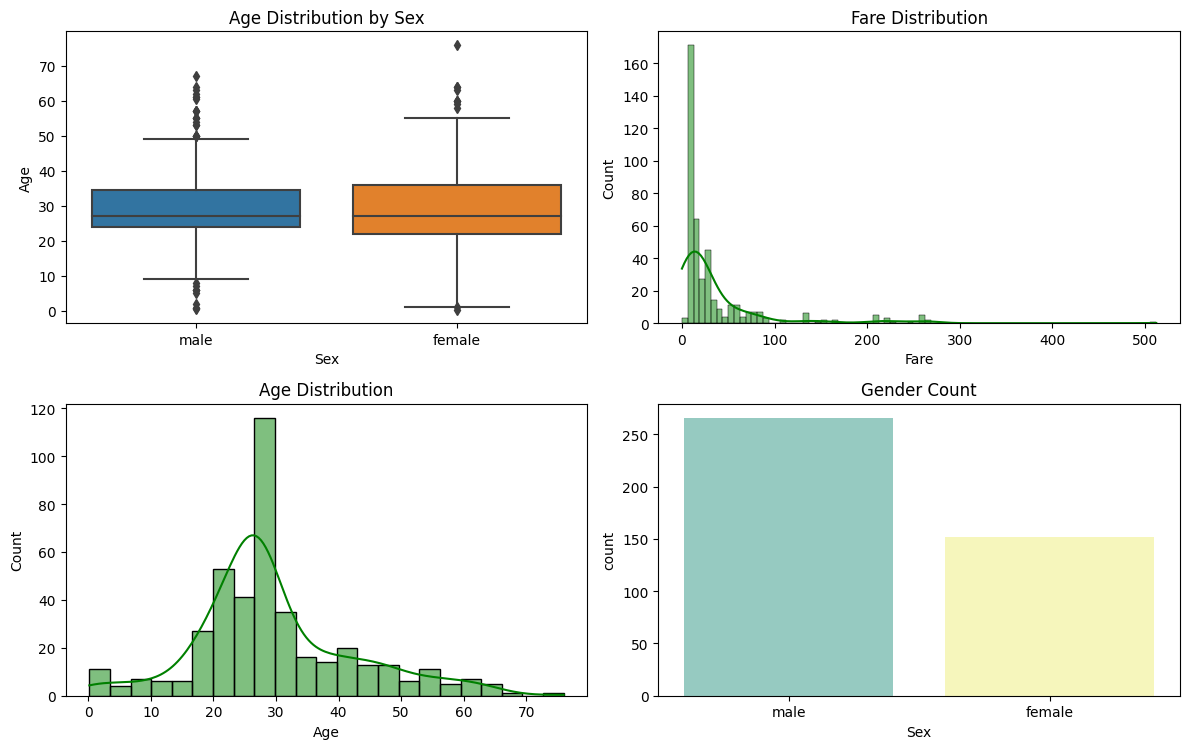

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Define plot parameters
plots = [
    {'data': titanic, 'x': 'Sex', 'y': 'Age', 'kind': 'box', 'title': 'Age Distribution by Sex'},
    {'data': titanic, 'x': 'Fare', 'kind': 'hist', 'color': 'g', 'kde': True, 'title': 'Fare Distribution'},
    {'data': titanic, 'x': 'Age', 'kind': 'hist', 'color': 'g', 'kde': True, 'title': 'Age Distribution'},
    {'data': titanic, 'x': 'Sex', 'kind': 'count', 'palette': 'Set3', 'title': 'Gender Count'},
]

# Plot each subplot
for i, plot in enumerate(plots):
    ax = axs[i // 2, i % 2]
    if plot['kind'] == 'box':
        sns.boxplot(x=plot['x'], y=plot['y'], data=plot['data'], ax=ax)
    elif plot['kind'] == 'hist':
        sns.histplot(x=plot['x'], data=plot['data'], color=plot['color'], kde=plot['kde'], ax=ax)
    elif plot['kind'] == 'count':
        sns.countplot(x=plot['x'], data=plot['data'], palette=plot['palette'], ax=ax)
    ax.set_title(plot['title'])

# Adjust subplot spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [52]:
titanic[titanic['Age']>=60]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
2,0,2,male,62.0,0,0,240276,9.6875
13,0,2,male,63.0,1,0,24065,26.0000
48,1,1,female,60.0,0,0,11813,76.2917
69,1,1,female,60.0,1,4,19950,263.0000
81,0,1,male,67.0,1,0,PC 17483,221.7792
96,1,1,female,76.0,1,0,19877,78.8500
114,1,1,female,63.0,1,0,PC 17483,221.7792
142,0,1,male,61.0,1,3,PC 17608,262.3750
152,0,3,male,60.5,0,0,3701,14.4542
179,1,1,female,64.0,0,2,PC 17756,83.1583


In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [54]:
# Function to apply label encoding to a DataFrame column
def label_encode_column(data, column_name):
    label_encoder = LabelEncoder()
    data[column_name] = label_encoder.fit_transform(data[column_name])

# Apply label encoding to the 'Sex' column in the 'titanic' DataFrame
label_encode_column(titanic, 'Sex')


In [55]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,34.5,0,0,330911,7.8292
1,1,3,0,47.0,1,0,363272,7.0000
2,0,2,1,62.0,0,0,240276,9.6875
3,0,3,1,27.0,0,0,315154,8.6625
4,1,3,0,22.0,1,1,3101298,12.2875


In [56]:
titanic['Ticket'] = titanic['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [57]:
x = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

In [58]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,1,34.5,0,0,330911,7.8292
1,3,0,47.0,1,0,363272,7.0000
2,2,1,62.0,0,0,240276,9.6875
3,3,1,27.0,0,0,315154,8.6625
4,3,0,22.0,1,1,3101298,12.2875


In [59]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
X_train.shape

(334, 7)

MODEL BUILDING & TRAINING THE EACH MODEL

In [64]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import random

# Define a dictionary of machine learning models with custom settings
models = {
    'Logistic Regression': LogisticRegression(max_iter=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', C=1.0, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(10, 50), max_iter=10, random_state=42)
}

# Specify the maximum number of models to evaluate
max_models_to_evaluate = 3

# Randomly select a subset of models to evaluate
models_to_evaluate = random.sample(models.keys(), max_models_to_evaluate)

# Train and evaluate the selected models
for model_name in models_to_evaluate:
    model = models[model_name]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])

    print(f"Model: {model_name}\n")
    print(f"Accuracy: {accuracy * 100:.2f}%\n")
    print("Classification Report:\n")
    print(report)
    print("=" * 10)


Model: Logistic Regression

Accuracy: 61.90%

Classification Report:

              precision    recall  f1-score   support

Not Survived       0.62      1.00      0.76        52
    Survived       0.00      0.00      0.00        32

    accuracy                           0.62        84
   macro avg       0.31      0.50      0.38        84
weighted avg       0.38      0.62      0.47        84

Model: Neural Network

Accuracy: 60.71%

Classification Report:

              precision    recall  f1-score   support

Not Survived       0.61      0.98      0.76        52
    Survived       0.00      0.00      0.00        32

    accuracy                           0.61        84
   macro avg       0.31      0.49      0.38        84
weighted avg       0.38      0.61      0.47        84

Model: K-Nearest Neighbors

Accuracy: 71.43%

Classification Report:

              precision    recall  f1-score   support

Not Survived       0.75      0.81      0.78        52
    Survived       0.64      0.5

<ipython-input-64-7803a8e267dc>:25: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  models_to_evaluate = random.sample(models.keys(), max_models_to_evaluate)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and bein